# Importing Libraries 

In [1]:
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential , Input, layers , losses , optimizers , Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Importing & Loading Data 

In [2]:
directory_path="/kaggle/input/chest-xray-pneumonia/chest_xray/"
classes = os.listdir(directory_path)
image_class=[]
for class_name in classes:
    class_path = os.path.join(directory_path, class_name)
    image_class.append(class_path)

In [3]:
train=image_dataset_from_directory(image_class[4], image_size=(180 , 180),batch_size=64,shuffle=True , label_mode='binary')
val=image_dataset_from_directory(image_class[3] , image_size=(180 , 180),batch_size=64,shuffle=True,label_mode='binary')
test=image_dataset_from_directory(image_class[2], image_size=(180 , 180),batch_size=64,shuffle=True,label_mode='binary')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


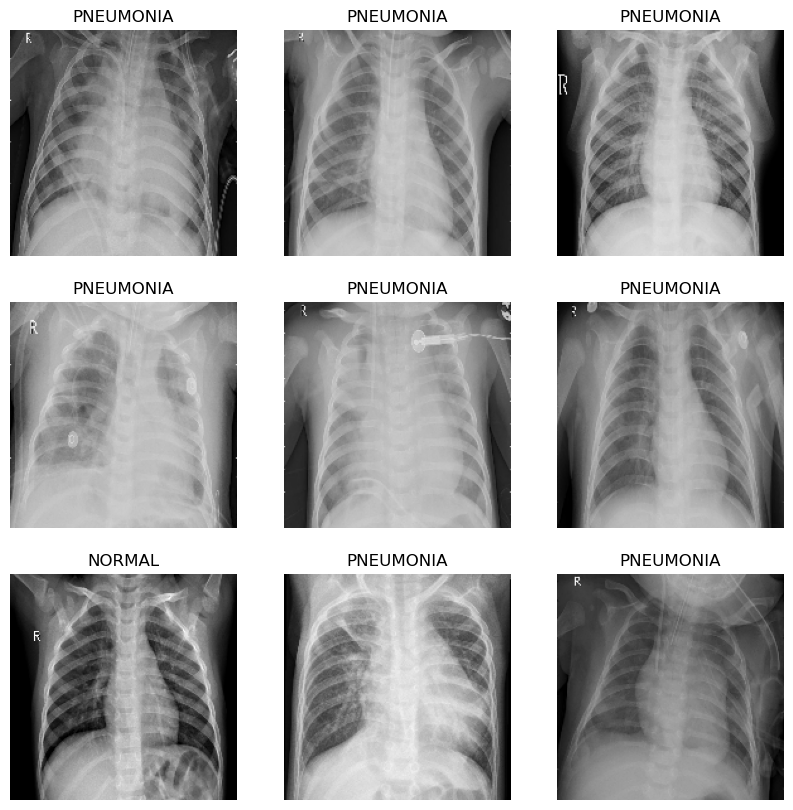

In [4]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):   # Take one batch of data
    for i in range(9):          
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[int(labels[i])]) 
        plt.axis('off')
        
plt.show()

## Data Preprocessing 

In [5]:

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

# Load and preprocess the training data
train_data = datagen.flow_from_directory(
    image_class[4],
    target_size=(180, 180),
    batch_size=64,
    class_mode='binary', 
    subset='training'
)

# Load and preprocess the validation data
validation_data = datagen.flow_from_directory(
    image_class[4],
    target_size=(180, 180),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [6]:
test_data = datagen.flow_from_directory(
    image_class[3],
    target_size=(180, 180),
    batch_size=64,
    class_mode='binary',
    shuffle=False)

Found 624 images belonging to 2 classes.


# Model building and Training

In [7]:
model=Sequential([
    layers.Input(shape=(180 , 180, 3)) , 
    layers.Conv2D( 8 , 3 , kernel_regularizer='l2' , padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(),
    layers.Conv2D( 16, 3,kernel_regularizer='l2', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu') ,
    layers.MaxPool2D(),

    layers.Conv2D( 32, 3,kernel_regularizer='l2', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu') ,  
    layers.MaxPool2D() , 

    layers.Flatten(), 
    layers.Dense(100  , activation='relu',kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(20  , activation='relu',kernel_regularizer='l2'),
    layers.Dropout(0.3),

    layers.Dense(1 , activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 180, 180, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 16)       6

In [8]:
model.compile(loss=losses.binary_crossentropy,optimizer=optimizers.Adam() , metrics=['accuracy'])

In [9]:
history=model.fit(train_data , epochs=15 ,validation_data=validation_data)

Epoch 1/15
66/66 [==============================] - 119s 2s/step - loss: 2.4486 - accuracy: 0.8409 - val_loss: 2.2143 - val_accuracy: 0.7430
Epoch 2/15
66/66 [==============================] - 107s 2s/step - loss: 1.1226 - accuracy: 0.9466 - val_loss: 1.8545 - val_accuracy: 0.7430
Epoch 3/15
66/66 [==============================] - 100s 2s/step - loss: 0.7447 - accuracy: 0.9545 - val_loss: 1.7999 - val_accuracy: 0.7430
Epoch 4/15
66/66 [==============================] - 106s 2s/step - loss: 0.5357 - accuracy: 0.9667 - val_loss: 1.6283 - val_accuracy: 0.7430
Epoch 5/15
66/66 [==============================] - 100s 2s/step - loss: 0.4470 - accuracy: 0.9650 - val_loss: 2.1273 - val_accuracy: 0.7430
Epoch 6/15
66/66 [==============================] - 100s 2s/step - loss: 0.3660 - accuracy: 0.9729 - val_loss: 1.6714 - val_accuracy: 0.7430
Epoch 7/15
66/66 [==============================] - 100s 2s/step - loss: 0.3668 - accuracy: 0.9597 - val_loss: 1.6666 - val_accuracy: 0.7430
Epoch 8/15
66

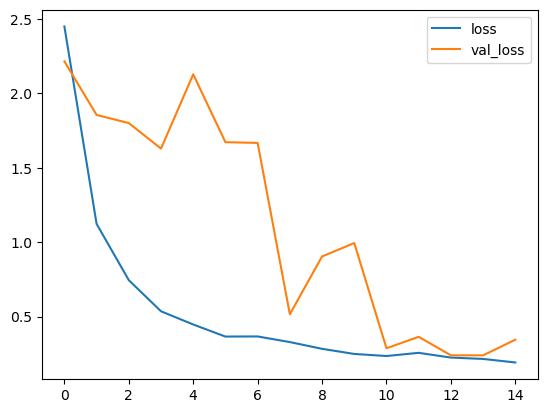

In [10]:
plt.plot(history.history['loss'] , label='loss')
plt.plot(history.history['val_loss'] , label='val_loss')
plt.legend()

In [11]:
loss , accuracy=model.evaluate(validation_data)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

17/17 [==============================] - 15s 858ms/step - loss: 0.3449 - accuracy: 0.9137
Test Loss: 0.3449, Test Accuracy: 0.9137


In [12]:
test_predictions = model.predict(test_data)

10/10 [==============================] - 11s 1s/step


In [13]:
loss, accuracy = model.evaluate(test_data)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

10/10 [==============================] - 8s 723ms/step - loss: 2.2078 - accuracy: 0.6410
Test Loss: 2.2078, Test Accuracy: 0.6410
